Dual energy carbonate CT
========================

test


In [1]:
import ipyparallel as ipp
cluster = ipp.Cluster(engines="mpi", n=5)
rc = cluster.start_and_connect_sync()
rc[:].activate() # enable magics

Starting 5 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/5 [00:00<?, ?engine/s]

In [2]:
%%px --block --group-outputs=type

import matplotlib.pyplot as plt
from IPython.display import display
import rockverse as rv

dectgroup = rv.dualenergyct.create_group(
    store='/path/to/dual_energy_ct/C04B21',
    overwrite=True)

dectgroup.copy_image(
    image=rv.open('/path/to/imported/dual_energy_carbonate/C04B21Raw100keV'),
    path='lowECT',
    overwrite=True)

dectgroup.copy_image(
    image=rv.open('/path/to/imported/dual_energy_carbonate/C04B21Raw140keV'),
    path='highECT',
    overwrite=True)

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:32:19] Copying array:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:32:24] Copying array:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:32:38] Histogram Low attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:32:39] Histogram Low attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:32:45] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:32:47] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

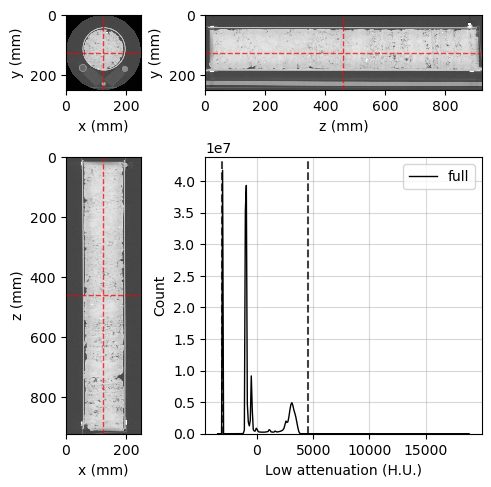

[output:0]

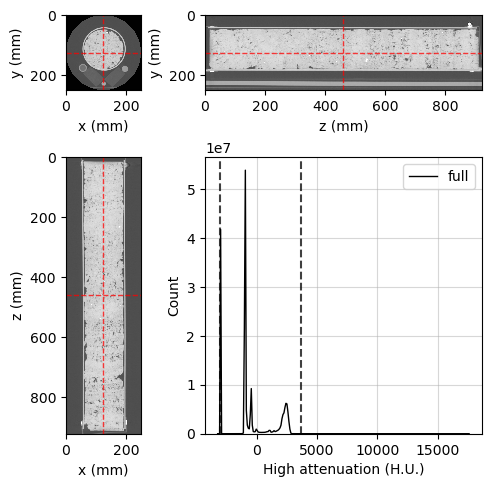

In [3]:
%%px --block --group-outputs=type
lowE_viewer = rv.OrthogonalViewer(image=dectgroup.lowECT)
highE_viewer = rv.OrthogonalViewer(image=dectgroup.highECT)

if rv.config['MPI']['mpi_rank'] != 0:
    plt.close(lowE_viewer.figure)
    plt.close(highE_viewer.figure)


%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:33:05] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:33:07] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

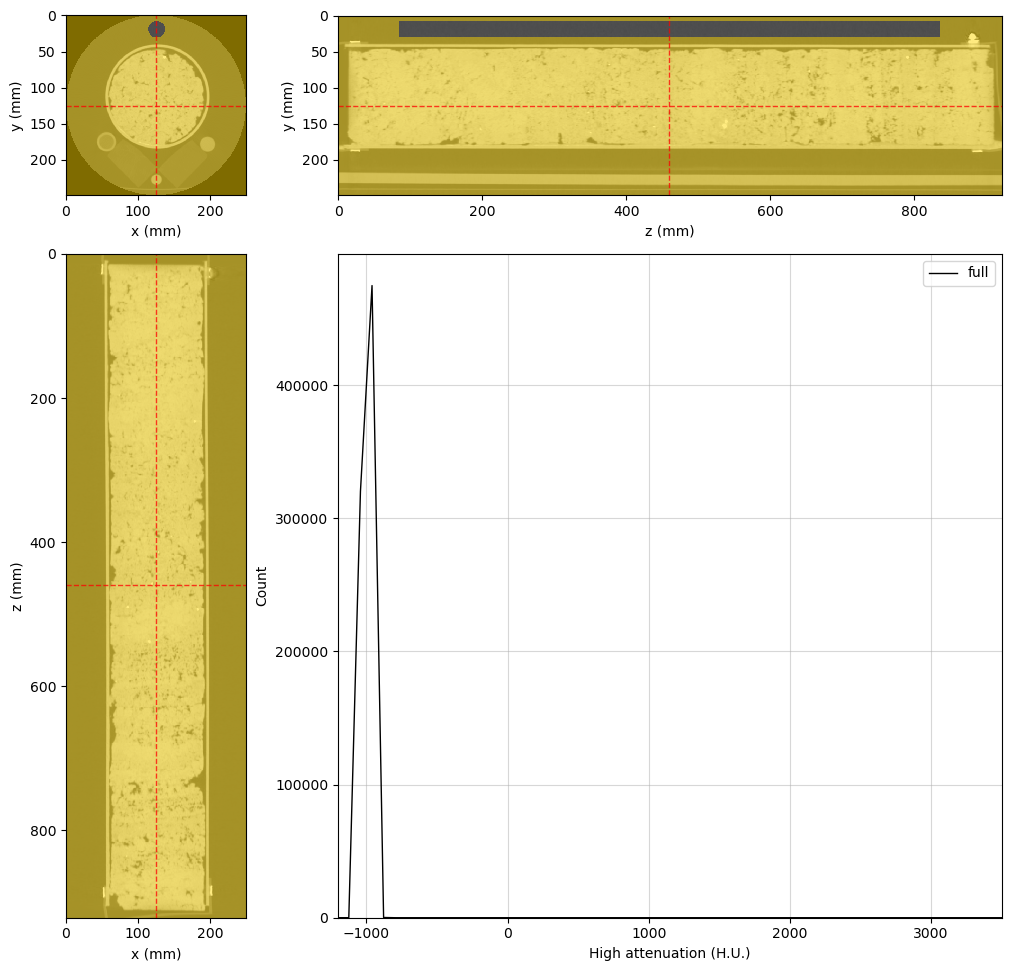

In [4]:
%%px --block --group-outputs=type

#Test with regions
highE_viewer.figure.set_size_inches(10, 10)

highE_viewer.mask_color = 'gold'
highE_viewer.mask_alpha = 0.5

air_region = rv.region.Cylinder(p=(126, 20, 461), v=(0, 0, 1), r=10, l=750)
highE_viewer.region = air_region

highE_viewer.ax_histogram.set_xlim(-1200, 3500)

if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)


[output:0]

[2025-01-10 11:33:18] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:33:19] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

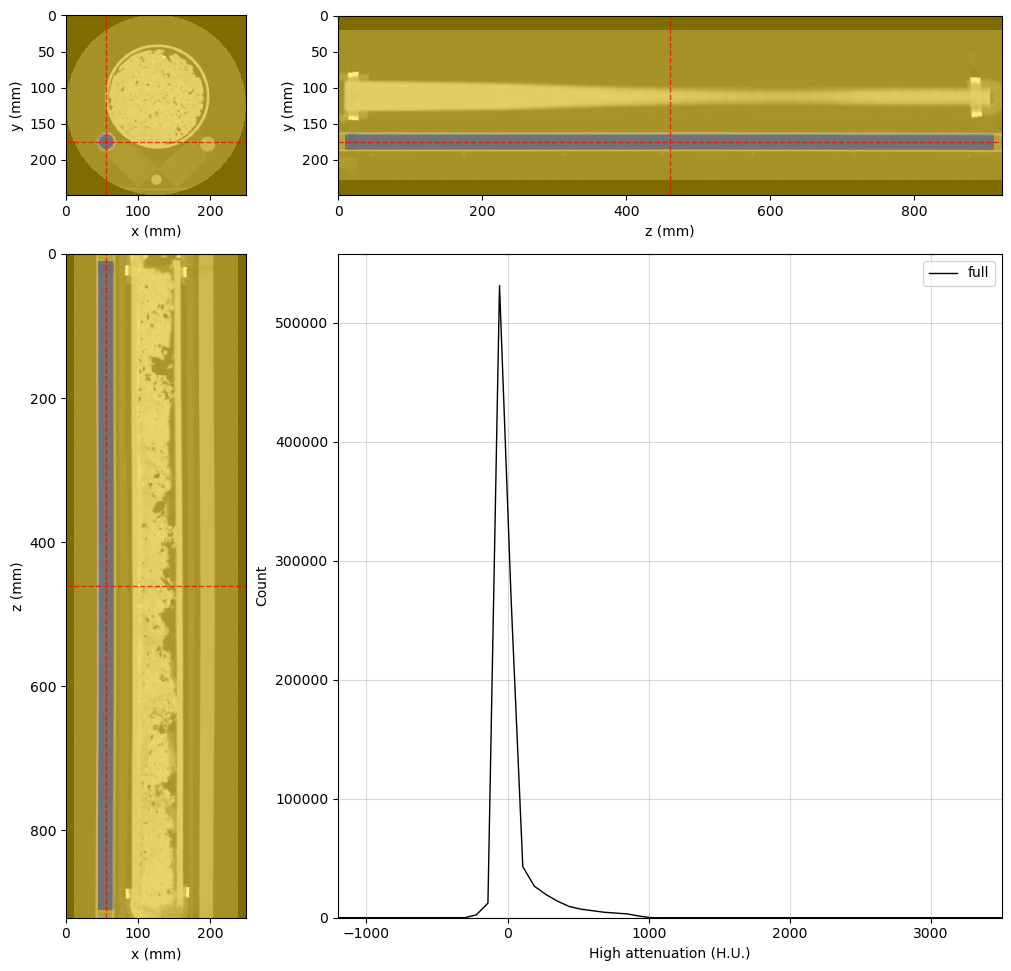

In [5]:
%%px --block --group-outputs=type

#Test with regions
water_region = rv.region.Cylinder(p=(55, 176.2, 461), v=(0, 0, 1), r=10, l=900)
highE_viewer.region = water_region
highE_viewer.ref_point = water_region.p
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:33:29] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:33:29] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

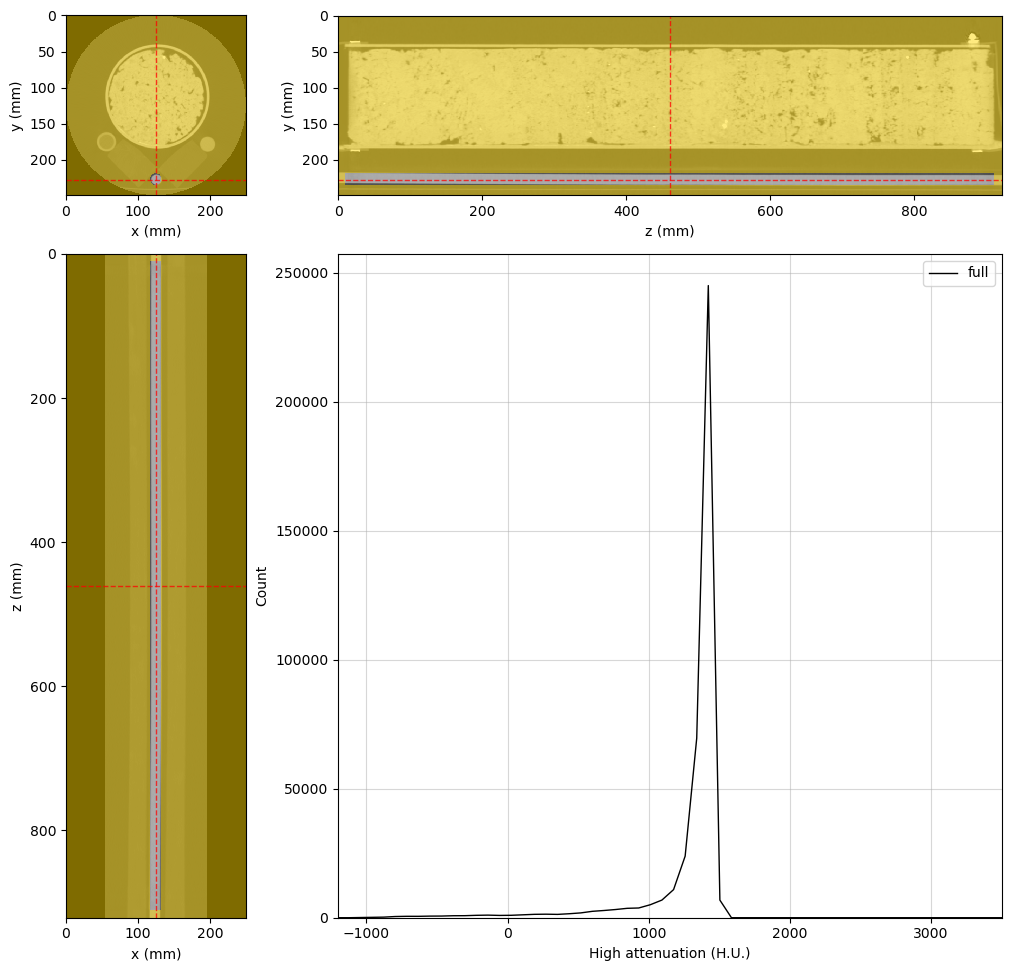

In [6]:
%%px --block --group-outputs=type

#Test with regions
teflon_region = rv.region.Cylinder(p=(124.7, 228, 461), v=(0, 0, 1), r=6.5, l=900)
highE_viewer.region = teflon_region
highE_viewer.ref_point = teflon_region.p
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:33:38] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:33:38] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

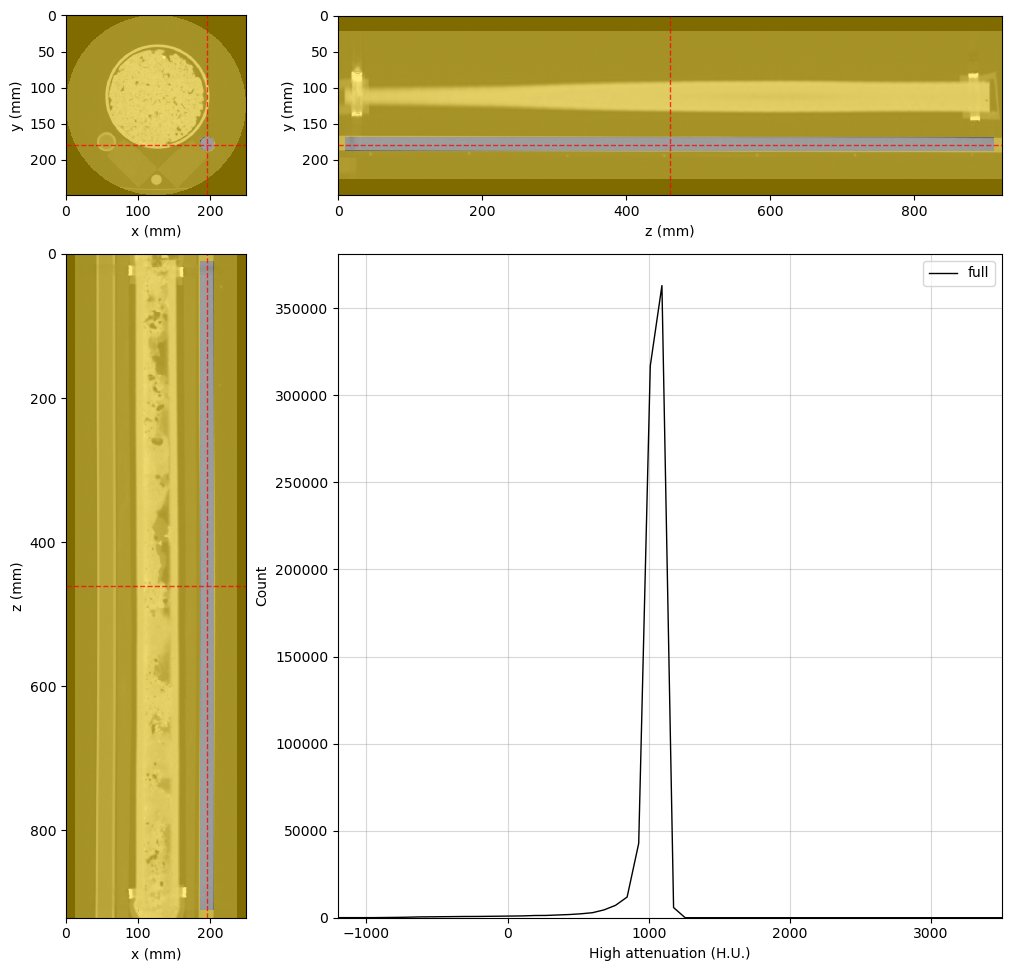

In [7]:
%%px --block --group-outputs=type

#Test with regions
silica_region = rv.region.Cylinder(p=(196, 179, 461), v=(0, 0, 1), r=9, l=900)
highE_viewer.region = silica_region
highE_viewer.ref_point = silica_region.p
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:33:46] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:33:46] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

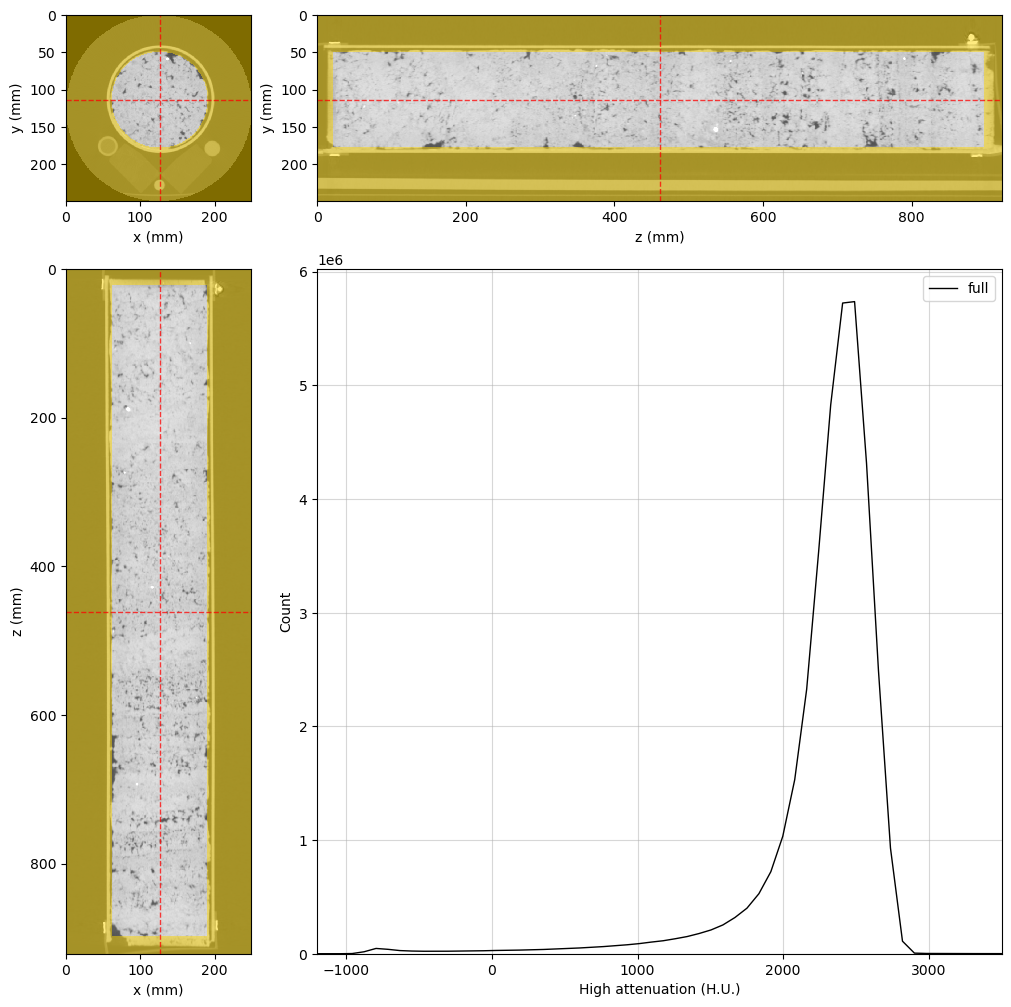

In [8]:
%%px --block --group-outputs=type

#Test with regions
rock_region = rv.region.Cylinder(p=(126, 114, 461), v=(0, 0, 1), r=63, l=875)
highE_viewer.region = rock_region
highE_viewer.ref_point = rock_region.p
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:34:28] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:28] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:29] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:34:30] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:31] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:32] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:34] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:36] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:37] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

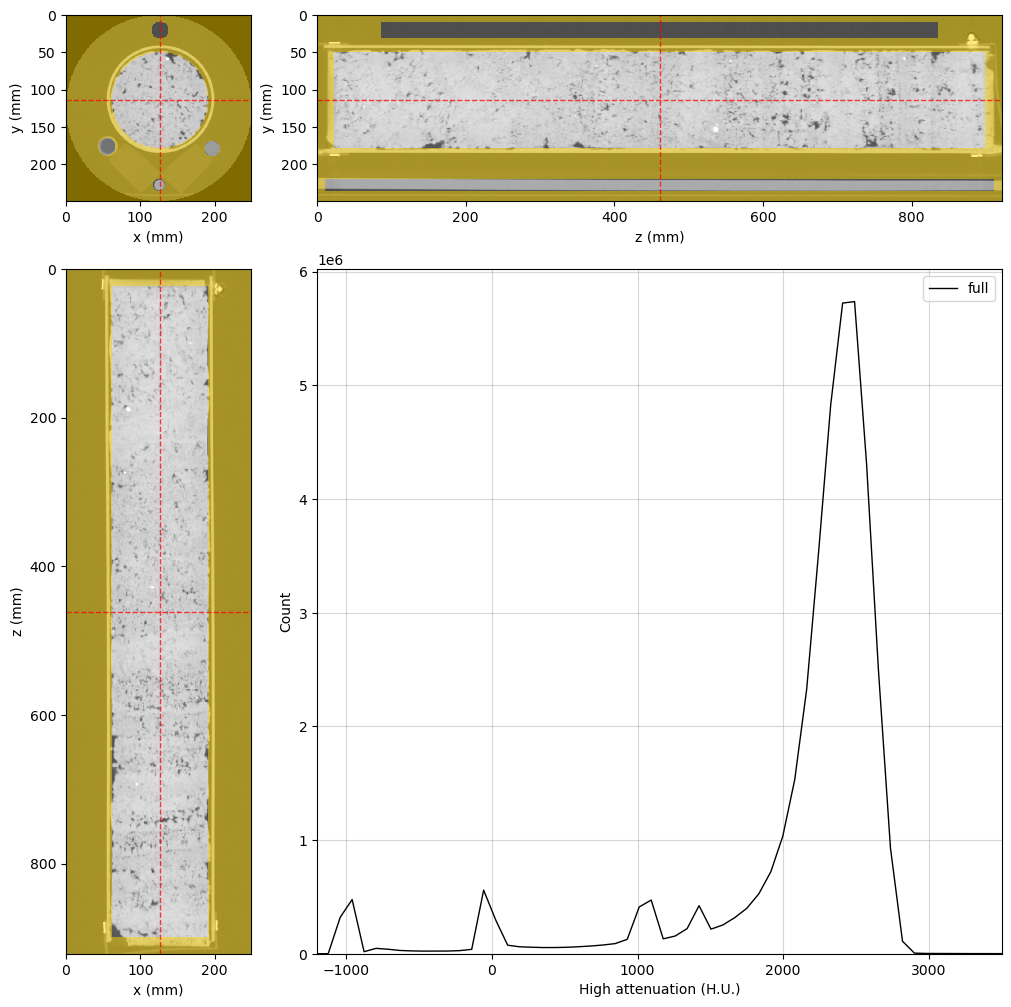

In [11]:
%%px --block --group-outputs=type

#DECT does not take regions, combine in a single mask
dectgroup.create_mask(fill_value=True, overwrite=True)
dectgroup.mask.math(value=False, op='set', region=air_region)
dectgroup.mask.math(value=False, op='set', region=water_region)
dectgroup.mask.math(value=False, op='set', region=teflon_region)
dectgroup.mask.math(value=False, op='set', region=silica_region)
dectgroup.mask.math(value=False, op='set', region=rock_region)
highE_viewer.region = None
highE_viewer.mask = dectgroup.mask
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:34:47] (segmentation) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:48] (segmentation) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:48] (segmentation) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:49] (segmentation) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:34:50] (segmentation) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:50] (mask) Set:   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:52] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:34:53] Histogram High attenuation (reading segmentation):   0%|          | 0/256 [00:00<?, ?chu…

[output:0]

[2025-01-10 11:34:54] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

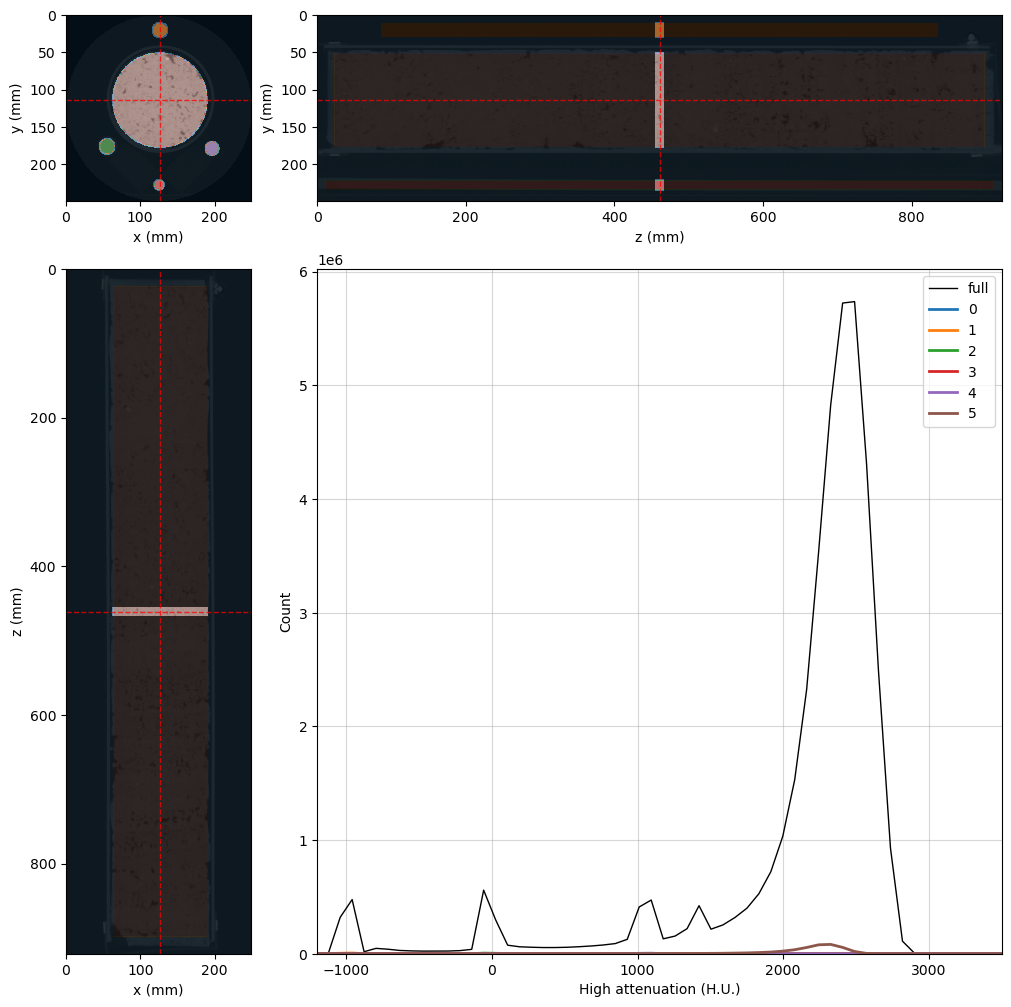

In [12]:
%%px --block --group-outputs=type

dectgroup.create_segmentation(fill_value=0, overwrite=True)
dectgroup.segmentation.math(value=1, op='set', region=air_region)
dectgroup.segmentation.math(value=2, op='set', region=water_region)
dectgroup.segmentation.math(value=3, op='set', region=teflon_region)
dectgroup.segmentation.math(value=4, op='set', region=silica_region)
dectgroup.segmentation.math(value=5, op='set', region=rock_region)


dectgroup.mask.math(value=True, op='set', region=rv.region.Cylinder(r=10000, p=rock_region.p, v=(0,0,1), l=10, region='outside'))

highE_viewer.segmentation = dectgroup.segmentation
highE_viewer.mask_color = 'k'
highE_viewer.mask_alpha = 0.75
highE_viewer.ax_histogram.set_xlim(-1200, 3500)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

[output:0]

[2025-01-10 11:35:04] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:35:05] Histogram High attenuation (reading segmentation):   0%|          | 0/256 [00:00<?, ?chu…

[output:0]

[2025-01-10 11:35:05] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

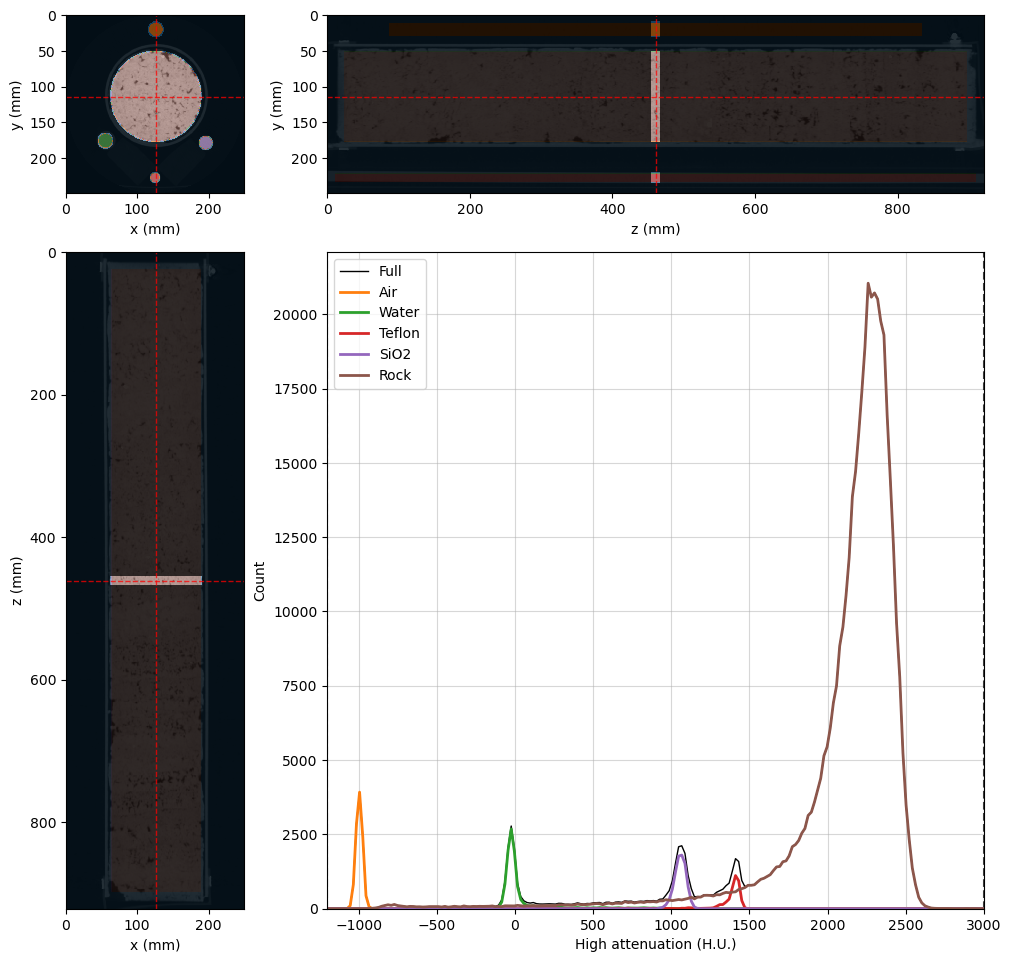

In [13]:
%%px --block --group-outputs=type

highE_viewer.histogram_bins=2**10
highE_viewer.update_image_dict(clim=(-1200, 3000))
highE_viewer.ax_histogram.set_xlim(-1200, 3000)

highE_viewer.ax_histogram.legend(
    [
        highE_viewer.histogram_lines['full'],
        highE_viewer.histogram_lines['1'],
        highE_viewer.histogram_lines['2'],
        highE_viewer.histogram_lines['3'],
        highE_viewer.histogram_lines['4'],
        highE_viewer.histogram_lines['5'],
    ], [
        'Full',
        'Air',
        'Water',
        'Teflon',
        'SiO2',
        'Rock'
    ]
)
if rv.config['MPI']['mpi_rank'] == 0:
    display(highE_viewer.figure)

In [14]:
%%px --block --group-outputs=type


dectgroup.histogram_bins = 2**10

dectgroup.calibration_material0['description'] = 'Air'
dectgroup.calibration_material0['segmentation_phase'] = 1
dectgroup.calibration_material0['lowE_gaussian_center_bounds'] = [-1050, -950]
dectgroup.calibration_material0['highE_gaussian_center_bounds'] = [-1050, -950]

dectgroup.calibration_material1['description'] = 'Water'
dectgroup.calibration_material1['segmentation_phase'] = 2
dectgroup.calibration_material1['composition'] = {'H': 2, 'O': 1}
dectgroup.calibration_material1['bulk_density'] = 1
dectgroup.calibration_material1['lowE_gaussian_center_bounds'] = [-100, 100]
dectgroup.calibration_material1['highE_gaussian_center_bounds'] = [-100, 100]

dectgroup.calibration_material2['description'] = 'SiO2'
dectgroup.calibration_material2['segmentation_phase'] = 3
dectgroup.calibration_material2['composition'] = {'Si': 1, 'O': 2}
dectgroup.calibration_material2['bulk_density'] = 2.2
dectgroup.calibration_material2['lowE_gaussian_center_bounds'] = [1550, 1700]
dectgroup.calibration_material2['highE_gaussian_center_bounds'] = [1300, 1500]

dectgroup.calibration_material3['description'] = 'Teflon'
dectgroup.calibration_material3['segmentation_phase'] = 4
dectgroup.calibration_material3['composition'] = {'C': 2, 'F': 4}
dectgroup.calibration_material3['bulk_density'] = 2.2
dectgroup.calibration_material3['lowE_gaussian_center_bounds'] = [1000, 1200]
dectgroup.calibration_material3['highE_gaussian_center_bounds'] = [1000, 1100]

dectgroup.preprocess()


#MELHORAR O OUPTUT SEM LINHAS NO TQDM

[output:0]

[2025-01-10 11:35:14] Hashing Low attenuation:   0%|          | 0/512 [00:00<?, ?line/s]

[output:3]

[2025-01-10 11:35:14] Hashing segmentation:   0%|          | 0/512 [00:00<?, ?line/s]

[output:2]

[2025-01-10 11:35:14] Hashing mask:   0%|          | 0/512 [00:00<?, ?line/s]

[output:1]

[2025-01-10 11:35:14] Hashing High attenuation:   0%|          | 0/512 [00:00<?, ?line/s]

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:35:18] Histogram Low attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:35:19] Histogram Low attenuation (reading segmentation):   0%|          | 0/256 [00:00<?, ?chun…

[output:0]

[2025-01-10 11:35:19] Histogram Low attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:35:20] Histogram High attenuation (min/max):   0%|          | 0/256 [00:00<?, ?chunk/s]

[output:0]

[2025-01-10 11:35:21] Histogram High attenuation (reading segmentation):   0%|          | 0/256 [00:00<?, ?chu…

[output:0]

[2025-01-10 11:35:21] Histogram High attenuation (counting voxels):   0%|          | 0/256 [00:00<?, ?chunk/s]

[stdout:0] [2025-01-10 11:35:22] Gaussian coefficients for calibration histograms:
                             A_lowE      mu_lowE  sigma_lowE      A_highE     mu_highE  sigma_highE
Calibration material 0  2606.146860  -996.872234   34.262505  3922.015062  -995.500464    21.659062
Calibration material 1  1917.651725   -30.690096   37.429786  2682.439552   -24.621953    25.757539
Calibration material 2   830.770845  1641.109997   37.144476  1116.230243  1412.104653    23.236605
Calibration material 3  1509.236392  1117.703237   47.499800  1805.210280  1058.858264    36.601931


[output:0]

[2025-01-10 11:35:22] Generating inversion coefficients:   0%|          | 0/100000 [00:00]

FAZER O PLOT

In [15]:
%%px --block --group-outputs=type
dectgroup.run()

[output:2]

[2025-01-10 11:36:17] Hashing mask:   0%|          | 0/512 [00:00<?, ?line/s]

[output:0]

[2025-01-10 11:36:17] Hashing Low attenuation:   0%|          | 0/512 [00:00<?, ?line/s]

[output:3]

[2025-01-10 11:36:17] Hashing segmentation:   0%|          | 0/512 [00:00<?, ?line/s]

[output:1]

[2025-01-10 11:36:17] Hashing High attenuation:   0%|          | 0/512 [00:00<?, ?line/s]

[stdout:0] [2025-01-10 11:36:19] lowEhistogram up to date.
[2025-01-10 11:36:19] highEhistogram up to date.
[2025-01-10 11:36:19] Gaussian coefficients for calibration histograms:
                             A_lowE      mu_lowE  sigma_lowE      A_highE     mu_highE  sigma_highE
Calibration material 0  2606.146860  -996.872234   34.262505  3922.015062  -995.500464    21.659062
Calibration material 1  1917.651725   -30.690096   37.429786  2682.439552   -24.621953    25.757539
Calibration material 2   830.770845  1641.109997   37.144476  1116.230243  1412.104653    23.236605
Calibration material 3  1509.236392  1117.703237   47.499800  1805.210280  1058.858264    36.601931
[2025-01-10 11:36:19] Calibration matrices up to date.
[2025-01-10 11:36:30] rho/Z inversion chunk 0/256: 0 voxels
[2025-01-10 11:36:30] rho/Z inversion chunk 1/256: 0 voxels
[2025-01-10 11:36:31] rho/Z inversion chunk 2/256: 0 voxels
[2025-01-10 11:36:31] rho/Z inversion chunk 3/256: 0 voxels
[2025-01-10 11:36:32] rho

%px:   0%|          | 0/5 [00:00<?, ?tasks/s]

[output:0]

[2025-01-10 11:36:55] rho/Z inversion chunk 74/256:   0%|          | 0/80 [00:00<?, ?voxel/s]

[output:0]

[2025-01-10 11:37:09] rho/Z inversion chunk 75/256:   0%|          | 0/5375 [00:00<?, ?voxel/s]

Received Keyboard Interrupt. Sending signal SIGINT to engines...


RemoteError: [Engine Exception] ValueError: only SIGTERM, CTRL_C_EVENT and CTRL_BREAK_EVENT signals are supported on Windows